In [5]:
#command out Ipython magic to ensure python compatibility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as matplot
# %matplotlib inline

df = pd.read_csv('/content/HR_comma_sep.csv')
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='Department'>

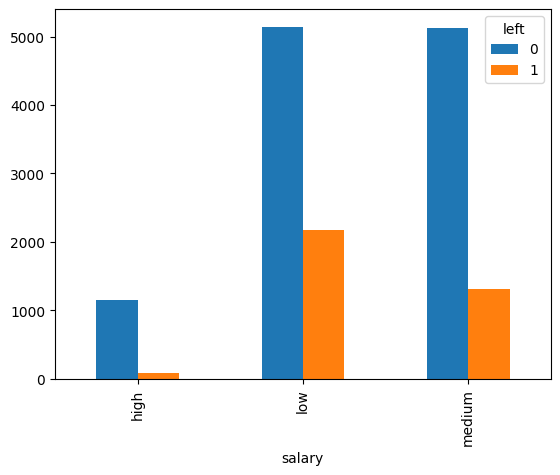

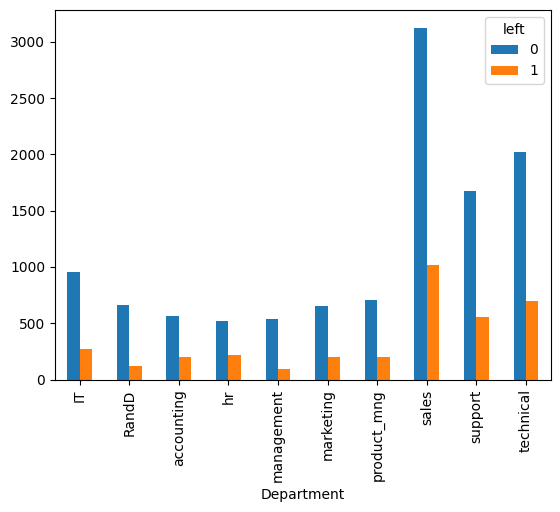

In [4]:
left = df.groupby('left')

pd.crosstab(df.salary,df.left).plot(kind='bar')
pd.crosstab(df.Department,df.left).plot(kind='bar')


In [11]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157,3,0,low
1,0.80,262,6,0,medium
2,0.11,272,4,0,medium
3,0.72,223,5,0,low
4,0.37,159,3,0,low


In [12]:
salary_dummies = pd.get_dummies(subdf.salary, prefix='salary')

df_with_dumies = pd.concat([subdf, salary_dummies], axis='columns')

df_with_dumies.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,3,0,low,False,True,False
1,0.80,262,6,0,medium,False,False,True
2,0.11,272,4,0,medium,False,False,True
3,0.72,223,5,0,low,False,True,False
4,0.37,159,3,0,low,False,True,False


In [13]:
df_with_dumies.drop('salary', axis='columns', inplace=True)
df_with_dumies.head()

x = df_with_dumies
x.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,False,True,False
1,0.80,262,6,0,False,False,True
2,0.11,272,4,0,False,False,True
3,0.72,223,5,0,False,True,False
4,0.37,159,3,0,False,True,False


In [17]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

model.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7644444444444445

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[3162  280]
 [ 780  278]]


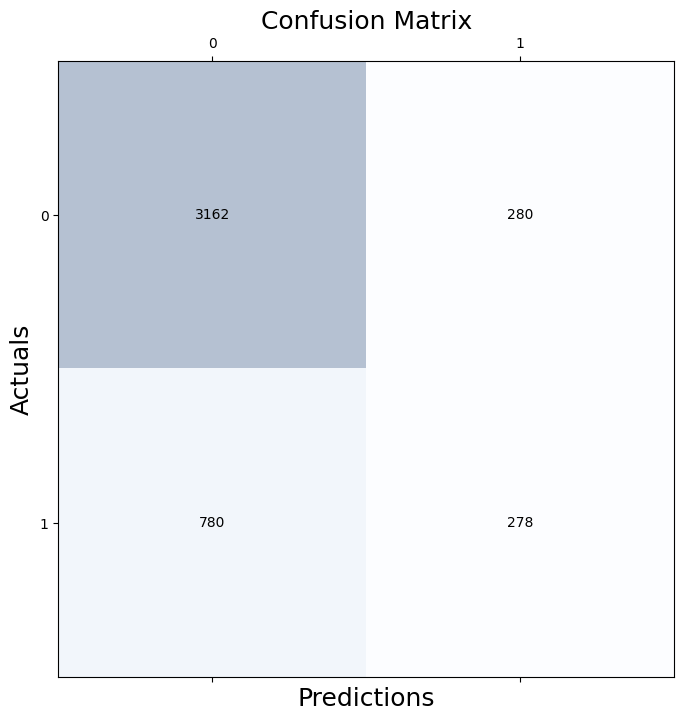

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

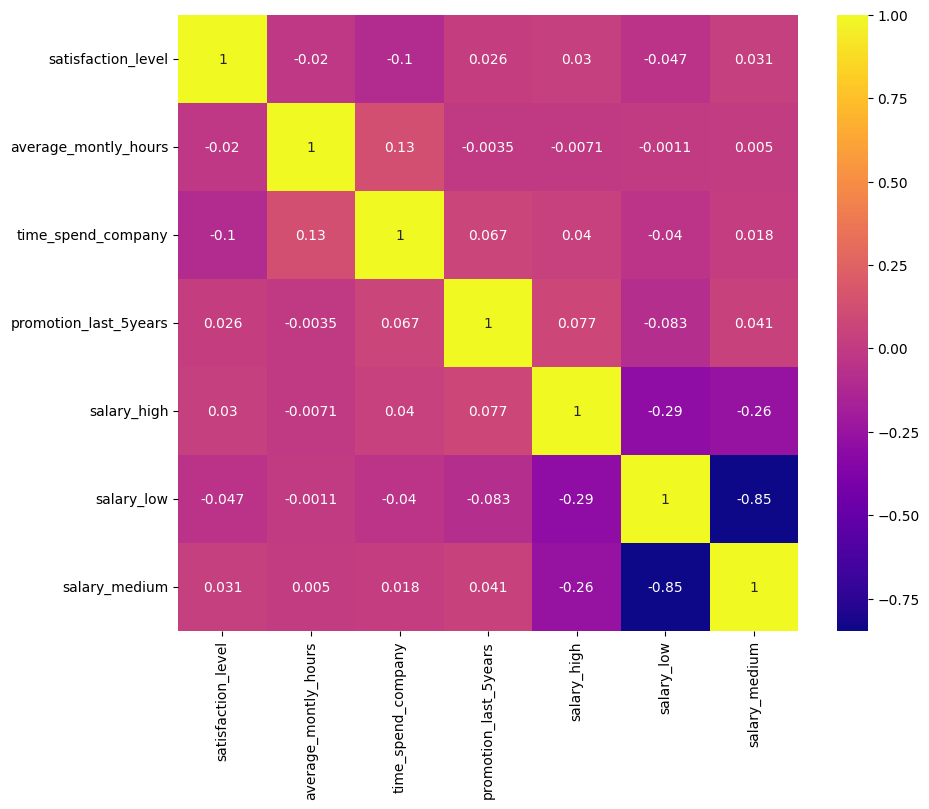

In [30]:
#calculate the correlation_matrix
carrelation_matrix = df_with_dumies.corr()

#create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(carrelation_matrix, annot=True,cmap='plasma')
plt.show()